In [9]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [10]:
# Read in the california housing data set
california_data = pd.read_csv('../Resources/California_Housing.csv')
california_data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,5.2742,17.0,8.908654,1.884615,351.0,1.687500,32.98,-117.27
1,1.8438,52.0,3.069847,1.044293,2382.0,4.057922,34.07,-118.26
2,7.0691,13.0,6.689697,1.009697,2444.0,2.962424,37.57,-121.87
3,5.4719,38.0,5.890080,0.957105,1228.0,3.292225,37.52,-122.28
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41


In [11]:
# Get the information on the DataFrame
california_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      3000 non-null   float64
 1   HouseAge    3000 non-null   float64
 2   AveRooms    3000 non-null   float64
 3   AveBedrms   3000 non-null   float64
 4   Population  3000 non-null   float64
 5   AveOccup    3000 non-null   float64
 6   Latitude    3000 non-null   float64
 7   Longitude   3000 non-null   float64
dtypes: float64(8)
memory usage: 187.6 KB


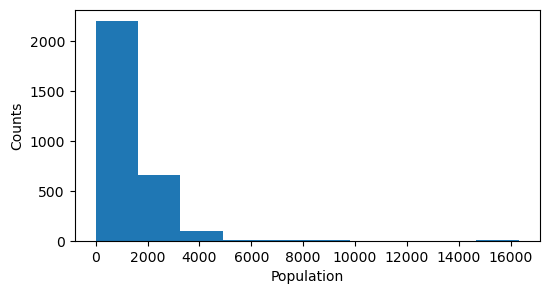

1387.9633333333334
1152.5
0    1128.0
Name: Population, dtype: float64


In [12]:
# Determine which measure of central tendency is most appropriate to describe the Population
tmp = california_data['Population']
plt.figure(figsize=(6,3))
plt.hist(tmp)
plt.xlabel('Population')
plt.ylabel('Counts')
plt.show()
print(tmp.mean())
print(tmp.median())
print(tmp.mode())
# median is the best descriptor of the data (if it was mean, there would be a bell curve)

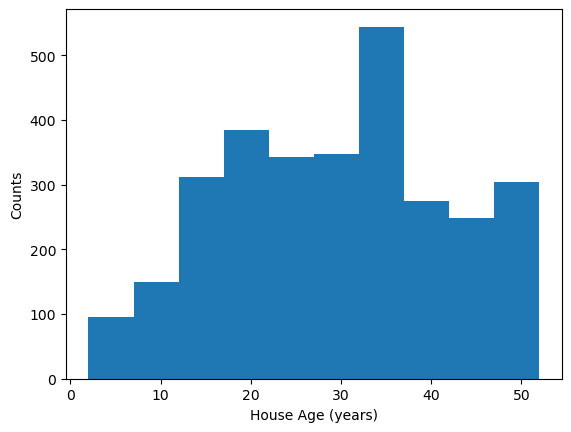

NormaltestResult(statistic=11.491251304140723, pvalue=0.003196733882674902)
NormaltestResult(statistic=198.6579339290652, pvalue=7.277425264590744e-44)


In [13]:
# Determine if the house age in California is normally distributed using a small and large sample size. 
age = california_data['HouseAge']
plt.hist(age)
plt.xlabel('House Age (years)')
plt.ylabel('Counts')
plt.show()
# not the same values as in the solution, but dunno what sample size they used
print(st.normaltest(age.sample(100)))
print(st.normaltest(age.sample(2000)))


In [14]:
# Determine if there are any potential outliers in the average occupancy in California
occ = california_data["AveOccup"]
q1 = occ.quantile(0.25)
q3 = occ.quantile(0.75)
iqr = q3 - q1
low = q1 - iqr * 1.5
high = q3 + iqr * 1.5
print(f'''The lower quartile of occupancy is: {q1}
The upper quartile of occupancy is: {q3}
The interquartile range of occupancy is: {iqr}
The the median of occupancy is: {occ.median()} 
Values below {low} could be outliers.
Values above {high} could be outliers.''')
outliers = california_data[(occ < low) | (occ > high)]
outliers

The lower quartile of occupancy is: 2.4250909806040477
The upper quartile of occupancy is: 3.297459274342836
The interquartile range of occupancy is: 0.8723682937387882
The the median of occupancy is: 2.81970199317512 
Values below 1.1165385399958654 could be outliers.
Values above 4.606011714951018 could be outliers.


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
4,4.0156,35.0,6.195312,1.171875,669.0,5.226562,33.93,-117.41
42,3.6429,26.0,5.836111,1.083333,2171.0,6.030556,38.57,-122.44
72,2.7759,30.0,4.167619,1.059048,2727.0,5.194286,33.83,-118.08
143,3.0509,30.0,5.598131,1.172897,1019.0,4.761682,33.94,-117.40
168,2.6300,29.0,3.496212,1.003788,2576.0,4.878788,33.97,-118.14
...,...,...,...,...,...,...,...,...
2793,2.5556,11.0,5.825112,1.255605,1158.0,5.192825,34.96,-120.45
2849,9.8892,40.0,8.244019,0.995215,976.0,4.669856,37.46,-122.20
2907,4.8750,5.0,7.101721,1.176056,7694.0,6.020344,34.69,-118.20
2919,1.6150,42.0,4.824000,1.216000,1167.0,4.668000,33.96,-118.28


In [15]:
# With the potential outliers, what is the lowest and highest median income (in $1000s) observed?
print(f'''The minimum median income of the potential outliers is {outliers['MedInc'].min()}
The maximum median income of the potential outliers is {outliers['MedInc'].max()}''')

The minimum median income of the potential outliers is 0.716
The maximum median income of the potential outliers is 15.0001


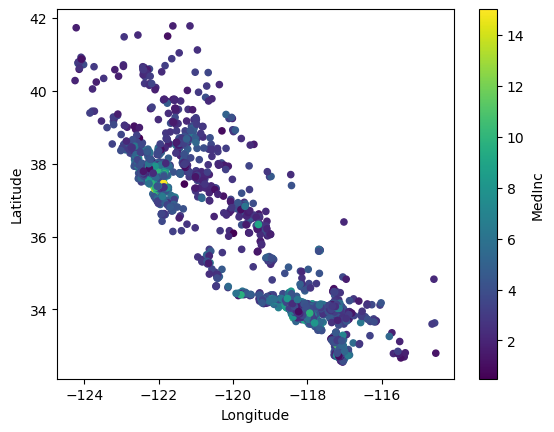

'matplotlib, which fixes the colorbar label to \'Median Income\'\nplt.scatter(california_data[\'Longitude\'],california_data[\'Latitude\'],c=california_data[\'MedInc\'])\nclb = plt.colorbar()\nplt.xlabel("Longitude")\nplt.ylabel("Latitude")\nclb.set_label("Median Income")\nplt.show()'

In [16]:
# Bonus - plot the latitude and longitude of the California housing data using Matplotlib, color the data points using the median income of the block.
california_data.plot.scatter(x='Longitude', y='Latitude', c='MedInc')
plt.show()

'''matplotlib, which fixes the colorbar label to 'Median Income'
plt.scatter(california_data['Longitude'],california_data['Latitude'],c=california_data['MedInc'])
clb = plt.colorbar()
plt.xlabel("Longitude")
plt.ylabel("Latitude")
clb.set_label("Median Income")
plt.show()'''